# Предобработка данных

In [1]:
!pip install eli5 

Defaulting to user installation because normal site-packages is not writeable


Нужные мне библиотеки:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from catboost import CatBoostClassifier
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from scipy import stats as st
from sklearn.metrics import confusion_matrix

import warnings
from tqdm.auto import tqdm
tqdm.pandas(desc="Loading ")
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

/opt/conda/lib/python3.7/site-packages/tqdm/std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Загружаю данные. Нужно на них взгялнуть

In [3]:
cont = pd.read_csv('/datasets/final_provider/contract.csv', parse_dates=[1])
pers = pd.read_csv('/datasets/final_provider/personal.csv')
inet = pd.read_csv('/datasets/final_provider/internet.csv')
phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [4]:
tables = cont, pers, inet, phone
names = ['cont', 'pers', 'inet', 'phone']
line = '↓' * 80

for i in range(len(tables)):
    display(f'Таблица {names[i]} {line}', tables[i].head())
    print(tables[i].info())
    display(f'Пропуски', tables[i].isna().mean())
    print()

'Таблица cont ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓'

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
customerID          7043 non-null object
BeginDate           7043 non-null datetime64[ns]
EndDate             7043 non-null object
Type                7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 440.3+ KB
None


'Пропуски'

customerID          0.0
BeginDate           0.0
EndDate             0.0
Type                0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
dtype: float64

'Таблица pers ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓'

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
customerID       7043 non-null object
gender           7043 non-null object
SeniorCitizen    7043 non-null int64
Partner          7043 non-null object
Dependents       7043 non-null object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None


'Пропуски'

customerID       0.0
gender           0.0
SeniorCitizen    0.0
Partner          0.0
Dependents       0.0
dtype: float64

'Таблица inet ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓'

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
customerID          5517 non-null object
InternetService     5517 non-null object
OnlineSecurity      5517 non-null object
OnlineBackup        5517 non-null object
DeviceProtection    5517 non-null object
TechSupport         5517 non-null object
StreamingTV         5517 non-null object
StreamingMovies     5517 non-null object
dtypes: object(8)
memory usage: 344.9+ KB
None


'Пропуски'

customerID          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

'Таблица phone ↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓'

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
customerID       6361 non-null object
MultipleLines    6361 non-null object
dtypes: object(2)
memory usage: 99.5+ KB
None


'Пропуски'

customerID       0.0
MultipleLines    0.0
dtype: float64

Видим, что разные количества строк в таблицах, числа имеют тип "object". Столбец EndDate нужно изменить на дату и время.
- Количество строк разное т.к. одни пользуются связью, а другие только интернетом.  

Исправим тип данных для чисел.

In [5]:
cont['TotalCharges'] = pd.to_numeric(cont['TotalCharges'], errors='coerce')

Проверим наличие пропусков, дубликатов. Глянем на распределения значений.

In [6]:
for i in tables:
    display(i.isna().mean())

customerID          0.000000
BeginDate           0.000000
EndDate             0.000000
Type                0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.001562
dtype: float64

customerID       0.0
gender           0.0
SeniorCitizen    0.0
Partner          0.0
Dependents       0.0
dtype: float64

customerID          0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

customerID       0.0
MultipleLines    0.0
dtype: float64

Видим, что появились пропуски в таблице cont. Это произошло по причине, что в этих строчках при типе "object" были пропуски т.к. люди только что начали пользоваться услугами компании и месяц еще не прошел для выставления общих затрат клиента.

In [7]:
cont[cont['TotalCharges'].isna()]

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


Т.к. у нас инфа о договорах актуальна на 1 февраля 2020 года, мы видим пропуски в столбце "TotalCharges" как раз у тех людей кто в этот день и приобрел услуги и у них еще нет выписки и соответственно от сюда и возникли пропуски. Заменим тут пропуски на месячные сборы, потому что по сути они уже все оплатили когда приобретали услугу и не важно, будут ли они пользоваться или нет, все оплачено.

In [8]:
cont['TotalCharges'] = cont['TotalCharges'].fillna(cont['MonthlyCharges'])

In [9]:
for i in range(len(tables)):
    display(f'В таблице {names[i]} {tables[i].duplicated().sum()} дубликатов')

'В таблице cont 0 дубликатов'

'В таблице pers 0 дубликатов'

'В таблице inet 0 дубликатов'

'В таблице phone 0 дубликатов'

In [10]:
cont.describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.798992
std,30.090047,2266.730170
min,18.250000,18.800000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


Видно, что средние затраты по месяцам 64, а по общей инфе 2283. Так аномалий не наблюдаю. Взглянем на графике.

In [11]:
def hist(df, name='График ...', x='Ось х', y='Ось y', xlim=(None, None)):
    plt.figure(figsize=(14, 8))
    plt.hist(df, bins=150, alpha=0.5)
    plt.title(name)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xlim(xlim)
    plt.show()

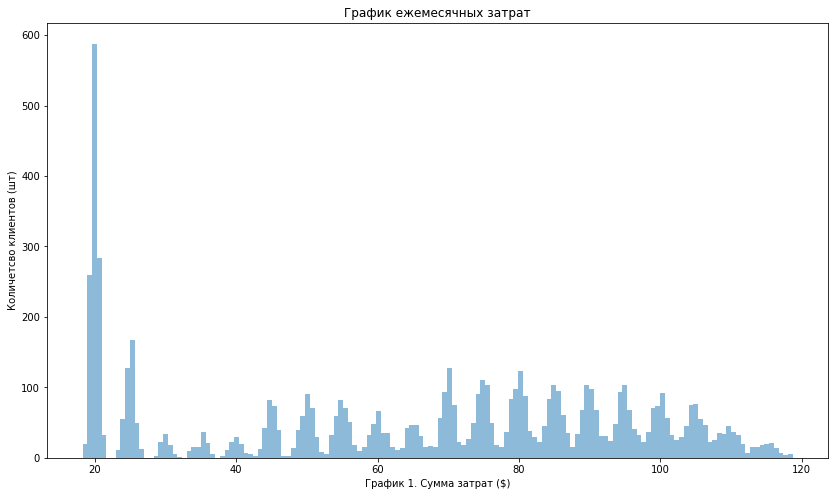

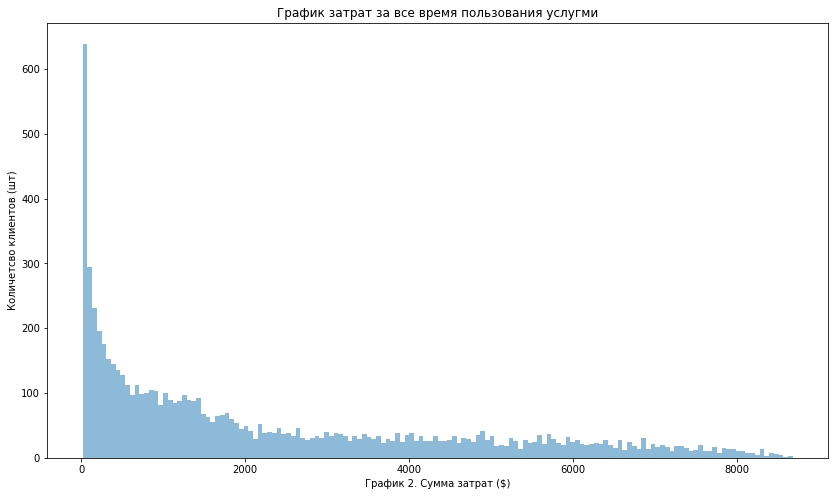

In [12]:
hist(cont.MonthlyCharges,
     'График ежемесячных затрат',
     'График 1. Сумма затрат ($)',
     'Количетсво клиентов (шт)')
hist(cont.TotalCharges,
     'График затрат за все время пользования услугми',
     'График 2. Сумма затрат ($)',
     'Количетсво клиентов (шт)')

- По графику 1 видно, что большенство людей тратят в месяц прмерно минимальную  сумму, видимо им много не надо. Остальные люди тратят по разному и этот разброс +- одинаковый. Но тут интересные пики - это бимодальность (бимодальное распределние) . Возможно есть оптимальные для многих параметры которые берут люди и платят примерно одинаковое число денег за услуги.
- По графику 2 видно, что это распределение Пуассона. Распределение смещено влево, а с увеличением затрат становитс симметричным и уходит вправо. Больше всего минимальных затрат, видимо людям не нрав что-то и они прекращают позьзоваться сервисом.

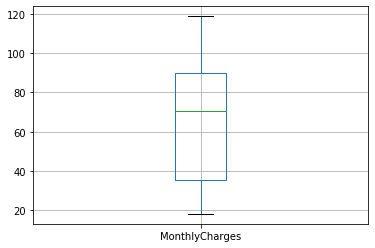

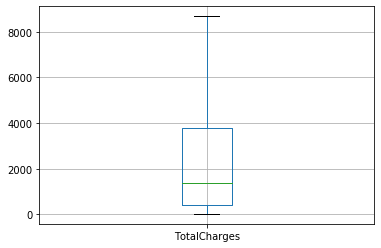

In [13]:
cont.boxplot('MonthlyCharges')
plt.show()

cont.boxplot('TotalCharges')
plt.show()

Аномалий по ящику с усами не наблюдаем.

# Разметка для target

У нас есть столбец EndData которая показывает ушел человек или еще пользуется услугой. Сделаем наш целевой признак.
- 0 - не ушел
- 1 - ушел.

In [14]:
cont['target'] = cont['EndDate'].apply(lambda x: x != 'No') * 1

Исправим EndDate, а пропуски заменим на сегоднейшую дату, чтобы рассчитать время жизни клиента.

In [15]:
cont['EndDate'] = pd.to_datetime(cont['EndDate'], format='%Y-%m-%d', errors='coerce')
cont['EndDate'] = cont['EndDate'].fillna(pd.Timestamp('2020-02-01'))

Объединим таблицы, чтобы создать признаки.

In [16]:
df = cont.merge(pers, on='customerID', how='outer')
df = df.merge(inet, on='customerID', how='outer')
df = df.merge(phone, on='customerID', how='outer')
df = df.fillna('No')

Создадим еще признаки - время жизни клиента в компании (все признаки кроме 'days' будут округлены в меньшую сторону. К примеру, если 7 дней не прошло, значит неделя не засчитана)

In [17]:
df['days'] = (df['EndDate'] - df['BeginDate']).dt.days
df['weeks'] = (df['EndDate']-df['BeginDate']).apply(lambda x: x/np.timedelta64(1,'W')).astype(int)
df['months'] = (df['EndDate']-df['BeginDate']).apply(lambda x: x/np.timedelta64(1,'M')).astype(int)
df['years'] = (df['EndDate']-df['BeginDate']).apply(lambda x: x/np.timedelta64(1,'Y')).astype(int)

Проверим на мультиколлинеарность признаки которыя я создал.

In [18]:
data_test = df[['days', 'weeks', 'months', 'years']]
corr = np.corrcoef(data_test, rowvar=0)
w, v = np.linalg.eig(corr)
w

array([3.98373492e+00, 1.61055069e-02, 3.26248414e-06, 1.56306445e-04])

Мультиколлинеарность между признаками 'weeks', 'months', 'years' очень сильная т.к. значения близки к 0. Удалим их.

In [19]:
df = df.drop(['weeks', 'months', 'years'], axis=1)

Добавим признак, количество сервисов.

In [20]:
columns = 'OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines'
columns = columns.split(', ')

def number_of_services(df):
    return (df[columns] == 'Yes').sum()

In [21]:
df['number_of_services'] = df.progress_apply(number_of_services, axis=1)

In [22]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,target,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,days,number_of_services
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,31,1
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.50,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1036,2
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,61,2
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,1371,3
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,61,0


Взглянем на время жизни клиентов на графике

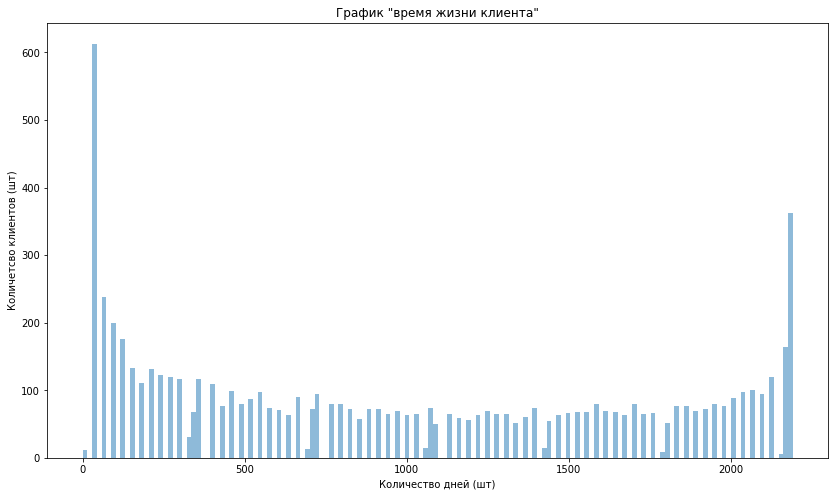

In [23]:
hist(df.days, 'График "время жизни клиента"',
     'Количество дней (шт)',
     'Количетсво клиентов (шт)')

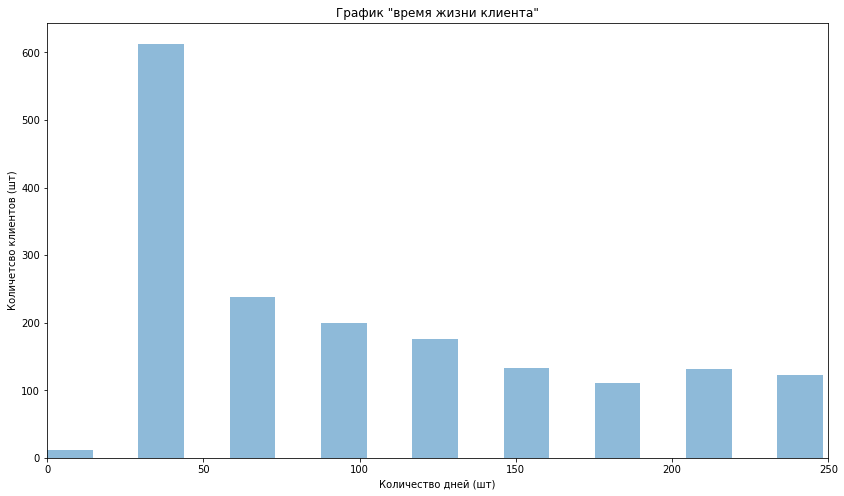

In [24]:
hist(df.days, 'График "время жизни клиента"',
     'Количество дней (шт)',
     'Количетсво клиентов (шт)',
    xlim=(0, 250))

График у нас в начале очень сильно отличается, т.к. многие уходят после 1 месяца пользования (это видно на сокращение клиентов во 2 месяце). Затем все стабилизируется и так же много людей в хвосте которые давно пользуются услугами компании.

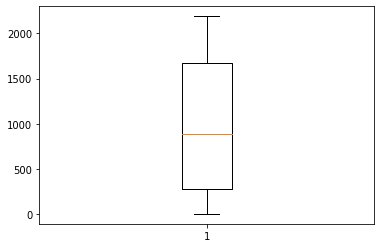

In [25]:
plt.boxplot(df.days)
plt.show()

Аномалий так же нет, данные распределены нормально.

# Поиск модели

Закодирую признаки с категориями и создам переменные с признаками и целевым. Но сначала избавлюсь от ненужных признаков.

In [26]:
df_final = df.drop(['customerID', 'BeginDate', 'EndDate'], axis=1)

In [27]:
df_ohe = pd.get_dummies(df_final, drop_first=True)
df_ohe.shape

(7043, 24)

In [28]:
y = df_ohe['target']
X = df_ohe.drop('target', axis=1)

Сделаю 2 выборки с размерами 70/30 (train/test).

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=12345,
                                                    stratify=y)
X_train.shape, X_test.shape

((4930, 23), (2113, 23))

Проверим дисбаланс классов

In [30]:
def checking_classes(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    return print(features_zeros.shape,
                 features_ones.shape,
                 target_zeros.shape,
                 target_ones.shape, sep='\n')

In [31]:
checking_classes(X_train, y_train)

(3622, 23)
(1308, 23)
(3622,)
(1308,)


Видим, что класс 1 почти в 3 раза меньше. Приведем баланс классов в норму

In [32]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    return shuffle(features_upsampled, target_upsampled, random_state=12345)

In [33]:
X_train, y_train = upsample(X_train, y_train, 3)
print(X_train.shape)
print(y_train.shape)

(7546, 23)
(7546,)


In [34]:
checking_classes(X_train, y_train)

(3622, 23)
(3924, 23)
(3622,)
(3924,)


Масштабируем признаки

In [35]:
numeric = 'MonthlyCharges, TotalCharges, days, number_of_services'
numeric = numeric.split(', ')

scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

Данные готовы, теперь займемся поиском модели. Глянем на логистическую регрессию, рещающее дерево, случайны лес и бустинг.

In [36]:
lienar_model = LogisticRegression(random_state=12345, class_weight='balanced')
score = cross_val_score(lienar_model, X_train, y_train, cv=5, scoring='accuracy')
print(score)
print(score.mean())

[0.77350993 0.76688742 0.78263751 0.77137177 0.75530504]
0.769942333689701


In [37]:
three_model = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
score = cross_val_score(three_model, X_train, y_train, cv=5, scoring='accuracy')
print(score)
print(score.mean())

[0.91059603 0.89205298 0.90125911 0.91053678 0.8938992 ]
0.9016688204370604


In [38]:
forest_model = RandomForestClassifier(random_state=12345, class_weight='balanced')
score = cross_val_score(forest_model, X_train, y_train, cv=5, scoring='accuracy')
print(score)
print(score.mean())

[0.91324503 0.89271523 0.91385023 0.92047714 0.90450928]
0.9089593835677825


In [39]:
cb_model = CatBoostClassifier(random_state=12345, iterations=300, verbose=300)
score = cross_val_score(cb_model, X_train, y_train, cv=5, scoring='accuracy')
print(score)
print(score.mean())

Learning rate set to 0.081463
0:	learn: 0.6535396	total: 52ms	remaining: 15.5s
299:	learn: 0.2325119	total: 6.07s	remaining: 0us
Learning rate set to 0.081463
0:	learn: 0.6530162	total: 3.27ms	remaining: 977ms
299:	learn: 0.2340966	total: 6.07s	remaining: 0us
Learning rate set to 0.081467
0:	learn: 0.6542183	total: 3.4ms	remaining: 1.02s
299:	learn: 0.2334244	total: 5.5s	remaining: 0us
Learning rate set to 0.081467
0:	learn: 0.6530335	total: 3.33ms	remaining: 997ms
299:	learn: 0.2345746	total: 5.7s	remaining: 0us
Learning rate set to 0.081471
0:	learn: 0.6523801	total: 3.29ms	remaining: 984ms
299:	learn: 0.2282068	total: 5.62s	remaining: 0us
[0.8781457  0.87152318 0.88071571 0.87673956 0.86405836]
0.8742364995999028


Бустинг, случайный лес и дерево решений показали лучшие результаты. Протестируем их и выберем лучшую модель для дальнейшей корректировки признаков.

Обучим дерево решений.

In [40]:
%%time
three_model = DecisionTreeClassifier(class_weight='balanced', random_state=12345)

three_params = {'max_depth': range(1, 12, 1)}

three_grid = GridSearchCV(three_model, three_params, cv=5, scoring='accuracy')
three_grid.fit(X_train, y_train)
three_grid.best_params_

CPU times: user 939 ms, sys: 13.3 ms, total: 952 ms
Wall time: 951 ms


{'max_depth': 11}

In [41]:
predictions = three_grid.predict(X_test)
three_score = accuracy_score(y_test, predictions)

In [42]:
probabilites_logist = three_grid.predict_proba(X_test)
probabilites_one_logist = probabilites_logist[:, 1]
three_roc_auc = roc_auc_score(y_test, probabilites_one_logist)

Обучу алгоритм "случайны лес".

In [43]:
%%time
forest_model = RandomForestClassifier(class_weight='balanced', random_state=12345)

forest_params = {'max_depth': range(1, 11, 1),
                 'n_estimators': range(10, 110, 10)}

forest_grid = GridSearchCV(forest_model, forest_params, cv=5, scoring='accuracy')
forest_grid.fit(X_train, y_train)
forest_grid.best_params_

CPU times: user 1min 21s, sys: 589 ms, total: 1min 22s
Wall time: 1min 22s


{'max_depth': 10, 'n_estimators': 100}

In [44]:
predictions = forest_grid.predict(X_test)
forest_score = accuracy_score(y_test, predictions)

In [45]:
probabilites_logist = forest_grid.predict_proba(X_test)
probabilites_one_logist = probabilites_logist[:, 1]
forest_roc_auc = roc_auc_score(y_test, probabilites_one_logist)

Обучим бустинг.

In [46]:
%%time
cat_grid = CatBoostClassifier(loss_function='Logloss',
                               eval_metric='AUC',
                               task_type='CPU',
                               random_seed=12345)

cat_params = {'iterations' : [300],
              'learning_rate' : [0.1],
              'depth': [10]}

results = cat_grid.grid_search(cat_params, X=X_train, y=y_train, cv=5)

0:	loss: 0.9699071	best: 0.9699071 (0)	total: 17.9s	remaining: 0us
Estimating final quality...
CPU times: user 1min 53s, sys: 12 s, total: 2min 5s
Wall time: 2min 7s


In [47]:
print(cat_grid.get_best_score(), cat_grid.get_params(), sep='\n\n')

{'learn': {'Logloss': 0.08421642237680346}}

{'loss_function': 'Logloss', 'random_seed': 12345, 'eval_metric': 'AUC', 'task_type': 'CPU', 'depth': 10, 'iterations': 300, 'learning_rate': 0.1}


In [48]:
%%time
cat_grid.fit(X_train, y_train, verbose=100)

0:	total: 10.5ms	remaining: 3.15s
100:	total: 5.16s	remaining: 10.2s
200:	total: 10.6s	remaining: 5.22s
299:	total: 16.8s	remaining: 0us
CPU times: user 15.5 s, sys: 1.5 s, total: 17 s
Wall time: 17.7 s


In [49]:
predictions = cat_grid.predict(X_test)
cb_score = accuracy_score(y_test, predictions)

In [50]:
probabilites_logist = cat_grid.predict_proba(X_test)
probabilites_one_logist = probabilites_logist[:, 1]
cb_roc_auc = roc_auc_score(y_test, probabilites_one_logist)

Глянем на итоги моделей.

In [51]:
pd.DataFrame(data={'score_accuracy' : [three_score, forest_score, cb_score],
                              'ROC_AUC': [three_roc_auc, forest_roc_auc, cb_roc_auc]},
                        index=['Дерево решений', 'Случайны лес', 'CatBoost'])

,score_accuracy,ROC_AUC
Дерево решений,0.736394,0.789979
Случайны лес,0.775674,0.853460
CatBoost,0.822527,0.873985


После обучения видим, что наша метрика accuracy = 0.82, а ROC_AUC = 0.87. Взглянем на важность признаков.

In [53]:
perm = PermutationImportance(cat_grid, random_state=12345)
perm.fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=100)

Weight,Feature
0.1271 ± 0.0170,days
0.0117 ± 0.0072,TotalCharges
0.0068 ± 0.0064,InternetService_Fiber optic
0.0044 ± 0.0039,PaperlessBilling_Yes
0.0036 ± 0.0054,Type_Two year
0.0030 ± 0.0028,Dependents_Yes
0.0027 ± 0.0064,TechSupport_Yes
0.0019 ± 0.0041,Type_One year
0.0011 ± 0.0040,Partner_Yes
0.0008 ± 0.0019,StreamingMovies_Yes


Теперь видно, какие веса имеют признаки. Удалим ненужные.

# Обучение модели

Скорректируем признаки в выборках.

In [54]:
unnecessary_features = 'SeniorCitizen, OnlineBackup_Yes, DeviceProtection_Yes, MonthlyCharges, gender_Male, InternetService_No, MultipleLines_Yes, PaymentMethod_Mailed check, PaymentMethod_Credit card (automatic), StreamingTV_Yes, number_of_services'
unnecessary_features = unnecessary_features.split(', ')

X_train = X_train.drop(unnecessary_features, axis=1)
X_test = X_test.drop(unnecessary_features, axis=1)

Обучим нашу финальную модель подбирая гиперпараметры.

In [55]:
%%time
model = CatBoostClassifier(loss_function='Logloss',
                               eval_metric='AUC',
                               task_type='CPU',
                               random_seed=12345)

grid = {'iterations' : [700, 500, 300],
        'learning_rate' : [0.03, 0.1, 0.3],
        'depth': [8, 6, 4]
       }

results = model.grid_search(grid, X=X_train, y=y_train, cv=5)

0:	loss: 0.9521498	best: 0.9521498 (0)	total: 40.5s	remaining: 17m 33s
1:	loss: 0.9730893	best: 0.9730893 (1)	total: 1m 12s	remaining: 15m 6s
2:	loss: 0.9750911	best: 0.9750911 (2)	total: 1m 33s	remaining: 12m 31s
3:	loss: 0.9412149	best: 0.9750911 (2)	total: 1m 49s	remaining: 10m 27s
4:	loss: 0.9688856	best: 0.9750911 (2)	total: 2m 4s	remaining: 9m 6s
5:	loss: 0.9736115	best: 0.9750911 (2)	total: 2m 19s	remaining: 8m 9s
6:	loss: 0.9178778	best: 0.9750911 (2)	total: 2m 28s	remaining: 7m 4s
7:	loss: 0.9593329	best: 0.9750911 (2)	total: 2m 37s	remaining: 6m 14s
8:	loss: 0.9716465	best: 0.9750911 (2)	total: 2m 47s	remaining: 5m 34s
9:	loss: 0.9388655	best: 0.9750911 (2)	total: 3m 3s	remaining: 5m 12s
10:	loss: 0.9677184	best: 0.9750911 (2)	total: 3m 20s	remaining: 4m 51s
11:	loss: 0.9756335	best: 0.9756335 (11)	total: 3m 37s	remaining: 4m 31s
12:	loss: 0.9241807	best: 0.9756335 (11)	total: 3m 48s	remaining: 4m 6s
13:	loss: 0.9616252	best: 0.9756335 (11)	total: 4m	remaining: 3m 43s
14:	los

In [56]:
print(model.get_best_score(), model.get_params(), sep='\n\n')

{'learn': {'Logloss': 0.05584539326862278}}

{'loss_function': 'Logloss', 'random_seed': 12345, 'eval_metric': 'AUC', 'task_type': 'CPU', 'depth': 6, 'iterations': 700, 'learning_rate': 0.3}


In [57]:
%%time
model.fit(X_train, y_train, verbose=100)

0:	total: 3.49ms	remaining: 2.44s
100:	total: 1.87s	remaining: 11.1s
200:	total: 3.77s	remaining: 9.37s
300:	total: 5.74s	remaining: 7.61s
400:	total: 7.7s	remaining: 5.74s
500:	total: 9.77s	remaining: 3.88s
600:	total: 11.8s	remaining: 1.95s
699:	total: 13.7s	remaining: 0us
CPU times: user 12.8 s, sys: 1.25 s, total: 14 s
Wall time: 14.7 s


Глянем результат на тестовой выборке.

In [58]:
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.8461902508282063

In [59]:
probabilites_logist = model.predict_proba(X_test)
probabilites_one_logist = probabilites_logist[:, 1]
roc_auc_score(y_test, probabilites_one_logist)

0.9078780528143777

Наблюдаем прирост как и по метрике, так и по площади под кривой (наша площадь под кривой = 0.90, это говорит о том, что наша модель хорошо отделила классы друг от друга) . Это удовлетворяет нашему ТЗ.

Проверим на адекватность нашу модель.

In [60]:
dummy = DummyClassifier(strategy='prior')
dummy.fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)
accuracy_score(y_test, dummy_pred)

0.26549929010885

Видим, что наша модель лучше чем та, у которой все классы=1.

In [61]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1552
           1       0.71      0.71      0.71       561

    accuracy                           0.85      2113
   macro avg       0.80      0.80      0.80      2113
weighted avg       0.85      0.85      0.85      2113



In [62]:
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

In [63]:
pd.DataFrame(data={'1': [tp, fn], '0': [fp, tn]}, index=['1', '0'])

,1,0
1,397,161
0,164,1391


По матрице ошибок можно сказать следующее:
- Столбец точность (precision) показывает долю ошибок 1 и 2 рода пока искала правильные ответы:
    - по классу 0 - ошибка 1 рода - 11%
    - по классу 1 - ошибка 2 рода - 29%
    
    
- Столбец полноты (recall) показывает долю правильных 1 из всех 1 и долю правильных 0 из всех 0:
    - по классу 0 - 90% правильных ответов.
    - по классу 1 - 71% правильных ответов.

Теперь для бизнеса важно знать, какая ошибка принесет больше убытков. Если представить, что ошибка 1 рода (модель предсказала уход (1), а он остался (0)), то мы теряем 10 предоставляя ему скидку, чтобы он остался. Ошибка 2 рода (модель предсказала, что он останется (0), а он ушел (1)), то мы теряем 100 каждый месяц его отсуствия.
- ошибка 2 рода - 161 * 100 = 16100
- ошибка 1 рода - 164 * 10 = 1640

Получается, для бизнеса уход клиента гораздо убыточеный, чем если ему случайно предложить скидку. Значит нужно минимизировать в нашей моделе ошибку 2 рода.

# Доп. рассчеты

Обучил модель и получил прогнозы по тестовой выборке. Теперь проверим, как изменится прибыль компании с ошибкой 2 рода. Создадим таблицу, найдем тех людей кто ушел (1), а модель сказала что он остается (0) и вычтем из их общей прибыли по 100 за каждый месяц.

In [64]:
profit_table = pd.DataFrame(data=predictions, index=y_test.index, dtype=int, columns=['predict'])

Добавляю нужные столбцы.

In [65]:
profit_table['target'] = y_test
profit_table_final = profit_table.join(X['TotalCharges'], how='inner')
profit_table_final = profit_table_final.join(df[['BeginDate', 'EndDate']], how='inner')
profit_table_final['month_difference'] = (pd.Timestamp('2020-02-01') - profit_table_final['EndDate']).apply(lambda x: x/np.timedelta64(1,'M')).astype(int)

Добавляю расчеты по ошибке 2 рода и считаю общую сумму.

In [66]:
profit_table_final['error2'] = profit_table_final[(profit_table_final['predict'] == 0) & (profit_table_final['target'] == 1)]['month_difference'] * 100
profit_table_final['error2'] = profit_table_final['error2'].fillna(0)
profit_table_final['TotalCharges_predict'] = profit_table_final['TotalCharges'] - profit_table_final['error2']

In [67]:
profit_table_final.head()

,predict,target,TotalCharges,BeginDate,EndDate,month_difference,error2,TotalCharges_predict
6574,0,0,816.80,2019-05-01,2020-02-01,0,0.0,816.80
2691,0,0,369.25,2019-07-01,2020-02-01,0,0.0,369.25
6329,0,0,4904.20,2016-04-01,2020-02-01,0,0.0,4904.20
466,0,0,6538.45,2014-10-01,2020-02-01,0,0.0,6538.45
57,0,0,7076.35,2014-08-01,2020-02-01,0,0.0,7076.35


Проведем A/B-тест двух выборок.

Сравним две выборки с общими средними затратами клиентов по предсказаниям и target и узнаем, изменилась ли средняя прибыль компании или нет.

- H0 (нулевая гипотеза) - общая прибыль компании осталась без изменений
- Н1 (альтернативная гипотеза) - общая прибыль компании поменялась


- Порог принятие решения у нас 0.05

In [68]:
target_sum = profit_table_final['TotalCharges']
predict_sum = profit_table_final['TotalCharges_predict']

alpha = 0.05

In [69]:
np.var(target_sum, ddof=1), np.var(predict_sum, ddof=1)

(5132806.562003178, 5127129.59154657)

In [70]:
result = st.ttest_ind(target_sum, predict_sum, equal_var=False)
print('p-значение', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-значение 0.7942587354893048
Не удалось отвергнуть нулевую гипотезу


Отвергли Н1 в пользу Н0, что говорит о том, что с вероятностью 79% можно получить различия в прибыли случайно. Это очень большая вероятность, чтобы сказать, что ошибки 2 рода в моей модели сильно влияют на убытки компании.

Посмотрим на графике.

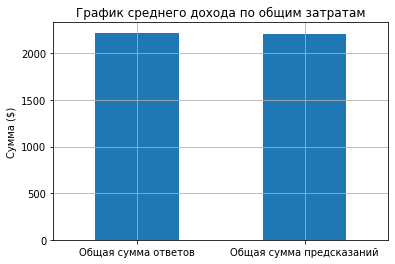

In [71]:
hypothesis0 = pd.pivot_table(profit_table_final,
                             index=profit_table_final.index,
                             values=['TotalCharges', 'TotalCharges_predict'])

hypothesis0.columns = ['Общая сумма ответов', 'Общая сумма предсказаний']
hypothesis0.mean().plot.bar(rot=0, title='График среднего дохода по общим затратам', grid=True)
plt.ylabel('Сумма ($)')
plt.show()

Теперь наглядно все видно. Если разница и есть, то она малозаметная и с 79% вероятностью случайна. Модель готова к работе.

# Вывод по проекту:

- В начале познакомились с данными и сделал небольшую предобработку. Проведены проверки по поиску: пропусков, дубликатов. Исправлены типы данных в таблицах. Провел анализ на наличие аномалий.
- Т.к. небыло разметки по которой можно было бы проводить обучение с учителем, сделал его в ручную по столбцу "EndDate" который показывал дату окончания пользованием услугой.
- Создал признаки, разделил на train и test выборки. Проверил баланса классов и провел тестировочные прогоны для моделей. 
- После тестов выбрал подходящую модель по accuracy и ROC-AUC. Отредактировал признаки и обучил заново модель подбирая гиперпараметры. Проверил мою модель на тестовых данных и получил значения удовлетворяющие ТЗ. Вывел классы на "матрице ошибок" и выяснил, что ошибка 2 рода самая дорогая для компании.
- Стоило бы протестировать модели еще раз не на accuracy, а на precision, чтобы найти модель которая минимизирует ошибку 2 рода лучше всех, но проведя А/В-тест выяснил, что моя модель предсказывает неплохо для того, чтобы компания не несла убытки по ошибке 2 рода.

**Итог:** Получил рабочую модель, которая не несет убытки в случае ухода клиента. 